<a href="https://colab.research.google.com/github/MayranAvila/ChallengeTELECOM/blob/main/TELECOM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importación archivo**

In [ ]:
import pandas as pd
datos=pd.read_csv('/content/df_final.csv')

In [ ]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
#comprobación de metadatos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


# **Parte 1.Preparación de los datos**

##**Eliminación de columnas irrelevantes**

In [ ]:
#eliminar columa id
datos=datos.drop('customerID', axis=1)
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


## Encoding

In [ ]:
#variable explicativa
X=datos.drop('Churn', axis=1)

#variable respuesta
y=datos['Churn']

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_diarias
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
y.head()

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes


In [ ]:
#importaciones para transformar variables obj
#variables explicativas
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

#variable respuesta
from sklearn.preprocessing import LabelEncoder

In [ ]:
#transformar la variable respuesta
y=LabelEncoder().fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Monthly', 'Total', 'Cuentas_diarias'],
      dtype='object')

In [ ]:
#transformando variables explicativas
columnas=X.columns

one_hot=make_column_transformer((OneHotEncoder(drop='if_binary'),['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']),remainder='passthrough',sparse_threshold=0, force_int_remainder_cols=False)

In [ ]:
X=one_hot.fit_transform(X)

In [ ]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__gender_Male', 'onehotencoder__SeniorCitizen_1',
       'onehotencoder__Partner_Yes', 'onehotencoder__Dependents_Yes',
       'onehotencoder__PhoneService_Yes',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet servic

In [ ]:
X

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        6.56000000e+01, 5.93300000e+02, 2.18666667e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.99000000e+01, 5.42400000e+02, 1.99666667e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.39000000e+01, 2.80850000e+02, 2.46333333e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.03000000e+01, 9.27500000e+01, 1.67666667e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        6.78500000e+01, 4.62765000e+03, 2.26166667e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        5.90000000e+01, 3.70760000e+03, 1.96666667e+00]])

In [ ]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_1,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,...,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__tenure,remainder__Monthly,remainder__Total,remainder__Cuentas_diarias
0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,9.0,65.60,593.30,2.186667
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,59.90,542.40,1.996667
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,4.0,73.90,280.85,2.463333
3,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,13.0,98.00,1237.85,3.266667
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,13.0,55.15,742.90,1.838333
7028,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,22.0,85.10,1873.70,2.836667
7029,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2.0,50.30,92.75,1.676667
7030,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,67.0,67.85,4627.65,2.261667


## Verificación de la proporción de cancelación

In [ ]:
#proporcion churn
datos['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.734215
Yes,0.265785


# **Parte 2. Correlación y selección de variables**

## Análisis de correlación

In [ ]:
#convertir churn a numero en la base de datos
datos['Churn'] = datos['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_diarias
0,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,1,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,1,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
#correlaciones
corr = datos.corr(numeric_only=True)
corr


,Churn,SeniorCitizen,tenure,Monthly,Total,Cuentas_diarias
Churn,1.000000,0.150541,-0.354049,0.192858,-0.199484,0.192858
SeniorCitizen,0.150541,1.000000,0.015683,0.219874,0.102411,0.219874
tenure,-0.354049,0.015683,1.000000,0.246862,0.825880,0.246862
Monthly,0.192858,0.219874,0.246862,1.000000,0.651065,1.000000
Total,-0.199484,0.102411,0.825880,0.651065,1.000000,0.651065
Cuentas_diarias,0.192858,0.219874,0.246862,1.000000,0.651065,1.000000


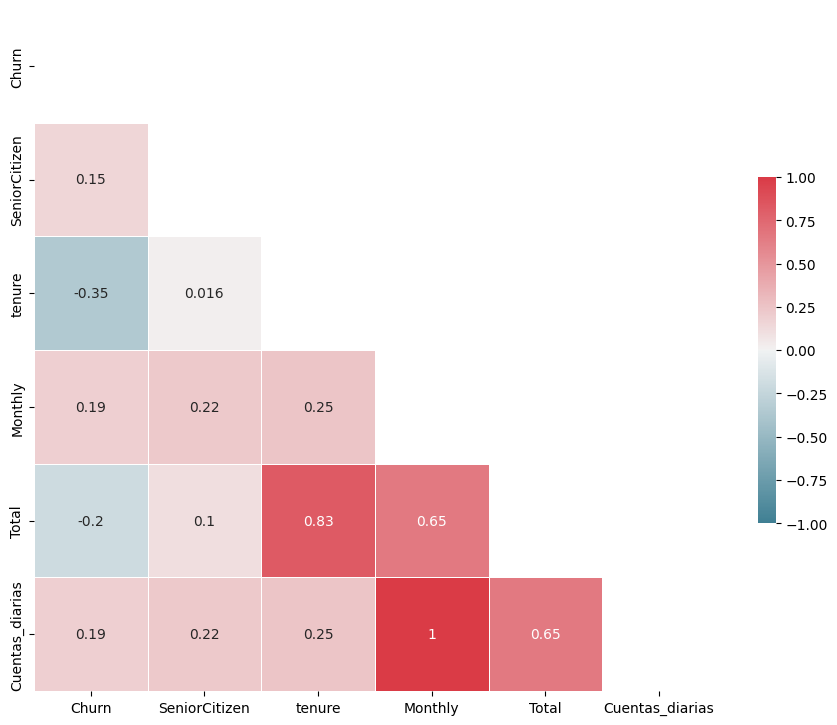

In [ ]:
# Cuáles factores están más correlacionados?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

## Análisis dirigido

/tmp/ipython-input-130364755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(x='Churn', y='tenure', data=datos, palette='Set3')


Text(0, 0.5, 'Tiempo de contrato')

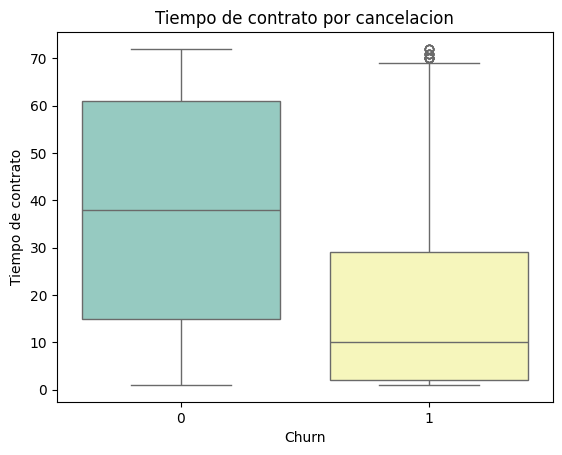

In [ ]:
#tiempo de contrato por cancelacion boxplot
ax=sns.boxplot(x='Churn', y='tenure', data=datos, palette='Set3')

#eje x
plt.title('Tiempo de contrato por cancelacion')
plt.ylabel('Tiempo de contrato')



/tmp/ipython-input-2669006287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(x='Churn', y='Total', data=datos, palette='Set3')


Text(0, 0.5, 'Gasto total')

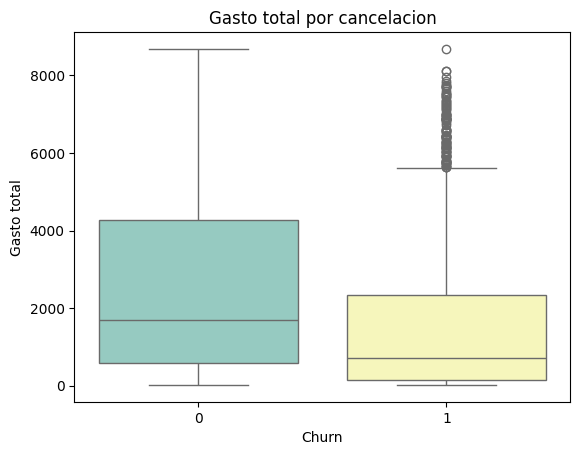

In [ ]:
#gasto total y cancelacion
ax=sns.boxplot(x='Churn', y='Total', data=datos, palette='Set3')

#eje x
plt.title('Gasto total por cancelacion')
plt.ylabel('Gasto total')

# **Parte 3. Modelo predictivo**

## Separación de datos

In [ ]:
#importaciones
from sklearn.model_selection import train_test_split

#Dividir en entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [ ]:
#balancer los datos con smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

## Creación de modelo

In [ ]:
#modelo 1: arbol de desicion
#importacion
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelo_arbol= DecisionTreeClassifier(random_state=42, max_depth=10)

modelo_arbol.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
modelo_arbol.score(X_test, y_test)

0.7573459715639811

In [ ]:
#calculando la exactitud de modelo
#el score nos ayuda a saber cuanto esta generalizando el modelo
print (f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo_arbol.score(X_train,y_train)}')



La exactitud del modelo con el conjunto de entrenamiento es de: 0.8563592035757822


### Modelo 2: KNN

#### Normalizacion

In [ ]:
#importación
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#normalizacion
normalizacion=MinMaxScaler()
X_train_normalizado=normalizacion.fit_transform(X_train)

In [ ]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.225352,0.739303,0.172663,0.739303
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.676056,0.017910,0.104350,0.017910
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.084507,0.020896,0.015209,0.020896
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.746479,0.714428,0.566928,0.714428
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.971831,0.853234,0.834451,0.853234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.098592,0.012438,0.016219,0.012438
4918,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.915493,0.111443,0.226673,0.111443
4919,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.957746,0.629353,0.638640,0.629353
4920,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.309859,0.013930,0.048246,0.013930


In [ ]:
#Balancear solo el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_normalizado, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()


In [ ]:
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier()

## Evaluación de los modelos

### Modelo 1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#precision  del modelo
print(f'La precision del modelo es de: {precision_score(y_test, modelo_arbol.predict(X_test))}')

#recall
print(f'El recall del modelo es de: {recall_score(y_test, modelo_arbol.predict(X_test))}')

#exatitud acuracy
print(f'La exactitud del modelo es de: {accuracy_score(y_test, modelo_arbol.predict(X_test))}')

#f1 score
print(f'El f1 score del modelo es de: {f1_score(y_test, modelo_arbol.predict(X_test))}')


La precision del modelo es de: 0.542608695652174
El recall del modelo es de: 0.5561497326203209
La exactitud del modelo es de: 0.7573459715639811
El f1 score del modelo es de: 0.5492957746478874


In [ ]:
#matriz de confusion
from sklearn.metrics import confusion_matrix
y_prev=modelo_arbol.predict(X_test)
confusion_matrix(y_test, y_prev)


array([[1286,  263],
       [ 249,  312]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

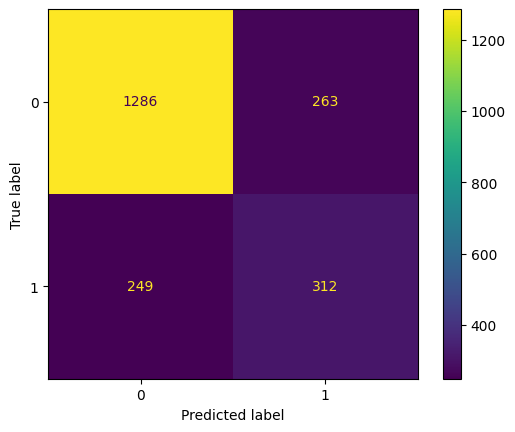

In [ ]:
#visualizacion
visualizacion=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_prev))
visualizacion.plot();

### Modelo 2

In [ ]:
#precision
print(f'La precision del modelo es de: {precision_score(y_test, knn.predict(X_test))}')

#recall
print(f'El recall del modelo es de: {recall_score(y_test, knn.predict(X_test))}')

#exactitud
print(f'La exactitud del modelo es de: {accuracy_score(y_test, knn.predict(X_test))}')

#f1 scores
print(f'El f1 score del modelo es de: {f1_score(y_test, knn.predict(X_test))}')

La precision del modelo es de: 1.0
El recall del modelo es de: 0.0017825311942959
La exactitud del modelo es de: 0.7345971563981043
El f1 score del modelo es de: 0.0035587188612099642


In [ ]:
#matriz de confusion
from sklearn.metrics import confusion_matrix
y_prev=knn.predict(X_test)
confusion_matrix(y_test, y_prev)

array([[1549,    0],
       [ 560,    1]])

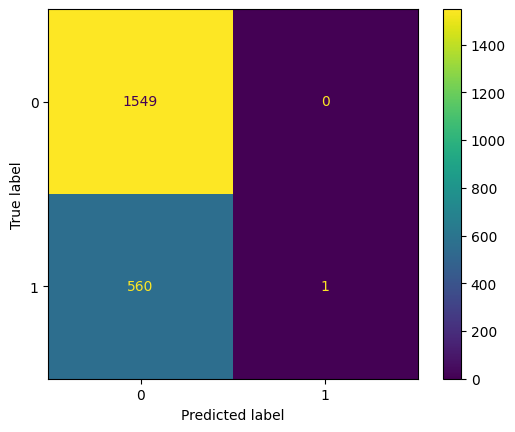

In [ ]:
#visualizacion
visualizacion=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_prev))
visualizacion.plot();

# **Parte 4. Interpretación y conclusiones**

Modelo 1-árbol de desicion
- Precision: De todas las veces que el modelo predijo que un cliente cancelaría (Churn = Yes), acertó el 54.3% de las veces.
- Recall: De todos los clientes que realmente cancelaron, el modelo detectó al 55.6%.
- Exactitud: El modelo predice correctamente en el 75.7% de los casos totales (tanto churn como no churn).

Notas:el modelo 1 esta detectando más de la mitad de los casos reales de churn y tiene una precisión moderada.

Modelo 2. KNN
-Precision: 1. significa que todas las predicciones positivas del modelo fueron correctas.Sin embargo, esto puede ser engañoso si el modelo casi nunca predice positivo.
-Recall:  es extremadamente bajo. Significa que el modelo casi no identifica los casos reales de “Churn = Yes” (cancelación).
- Exactitud: buena
-F1 score:El balance entre precisión y recall es extremadamente bajo. Esto confirma que el modelo no sirve para predecir churn.

Notas: el modelo KNN no tiene un buen nivel de detección de los casos de churn, esto se puede deber a que probablemente no se balancearon bien los datos en la prorcion de clientes churn y no.

Conclusión. En este caso el mejor modelo entrenado fue el 1 (árboles de desicion) comparado con el modelo 2 (KNN) esto puede deberse a que el modelo 1 puede trabajar mejor con datos desbalanceados mientras que el modelo de KNN es más sensible
